# content
- machine learning defination & techinques
- machine learning cycle
- regression algorithm
- simple linar regression
- cost function 
- scikit-learn exmple

In [22]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [6]:
train_data=pd.read_csv('kc_house_train_data.csv')
test_data=pd.read_csv('kc_house_test_data.csv')

In [11]:
train_data.shape

(17384, 21)

In [12]:
train_data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [16]:
train_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


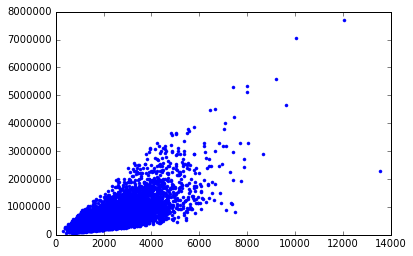

In [24]:
plt.plot(train_data['sqft_living'], train_data['price'],'.')

In [28]:
print 'sum: ',train_data['sqft_living'].sum()
print 'mean: ',train_data['sqft_living'].mean()
print 'type: ',type(train_data['sqft_living'])


sum:  36159233
mean:  2080.02950989
type:  <class 'pandas.core.series.Series'>


In [31]:
train_data['price'].size

17384

## Simple linear Regression Algorithm Implemenation

In [32]:
def simple_linear_regression(x, y):#x => input,y => output
    n=x.size
    sum_y=y.sum()
    sum_x=x.sum()
    sum_product_xy=(x*y).sum()
    product_sum_xy= sum_y* sum_x
    sum_x_square=(x**2).sum()
    square_sum_x=sum_x**2
    slope=(sum_product_xy-product_sum_xy/n)/(sum_x_square-square_sum_x/n)
    intercept=y.mean()-x.mean()*slope
    
    return (intercept,slope)
    
    

In [33]:
sqft_intercept, sqft_slope = simple_linear_regression(train_data['sqft_living'], train_data['price'])

print "Intercept: " + str(sqft_intercept)
print "Slope: " + str(sqft_slope)

Intercept: -47116.0790674
Slope: 281.958839628


In [34]:
predictions=sqft_intercept+test_data['sqft_living']*sqft_slope

In [37]:
error=test_data['price']-predictions
rss=(error**2).sum()
print rss

2.75402933618e+14


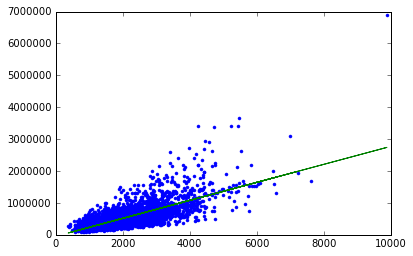

In [39]:
plt.plot(test_data['sqft_living'], test_data['price'],'.',
        test_data['sqft_living'], predictions,'-')

In [93]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit(train_data[['sqft_living']],train_data[['price']])
predictions=clf.predict(test_data[['sqft_living']])
error=test_data['price'].values-predictions
rss=(error**2).sum()
print rss

3.43675447333e+18


In [128]:
print type(predictions[:,0])
print  type(np.array(test_data['price']).)

<type 'numpy.float64'>
<type 'numpy.float64'>


In [123]:
np.array(test_data[['price']])[2]

array([ 233000.])

# Accuracy Score